<a href="https://colab.research.google.com/github/khoatran02/Speech_Emotion_Recognition_Using_LTSM.ipynb/blob/main/Speech_Emotion_Recognition_Using_LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Load data from Kaggle

In [ ]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess")
#  link dataset
#{"username":"trnhonganhkhoa","key":"e60cbed63c7999af3a91e18c4e851878"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: trnhonganhkhoa
Your Kaggle Key: ··········


100%|██████████| 428M/428M [00:05<00:00, 80.1MB/s]


#Import libary

In [ ]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label =filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

len(labels)

2800

In [ ]:
paths[:5]

['/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_tell_happy.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_match_happy.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_kick_happy.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_search_happy.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_name_happy.wav']

# Create a dataframe

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df

,speech,label
0,/content/toronto-emotional-speech-set-tess/TES...,happy
1,/content/toronto-emotional-speech-set-tess/TES...,happy
2,/content/toronto-emotional-speech-set-tess/TES...,happy
3,/content/toronto-emotional-speech-set-tess/TES...,happy
4,/content/toronto-emotional-speech-set-tess/TES...,happy
...,...,...
2795,/content/toronto-emotional-speech-set-tess/TES...,angry
2796,/content/toronto-emotional-speech-set-tess/TES...,angry
2797,/content/toronto-emotional-speech-set-tess/TES...,angry
2798,/content/toronto-emotional-speech-set-tess/TES...,angry


In [ ]:
df['label'].value_counts()

happy      400
disgust    400
fear       400
neutral    400
ps         400
sad        400
angry      400
Name: label, dtype: int64

# Exploratory Data Anlysis and Visualization data

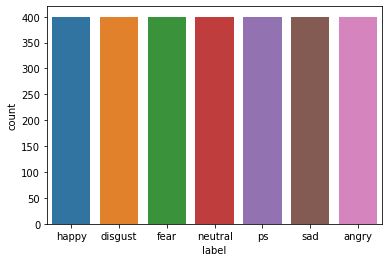

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveplot(data, sr, emotion): # Show wave diagram data and Audio data
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion): # Show Spectogram 
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

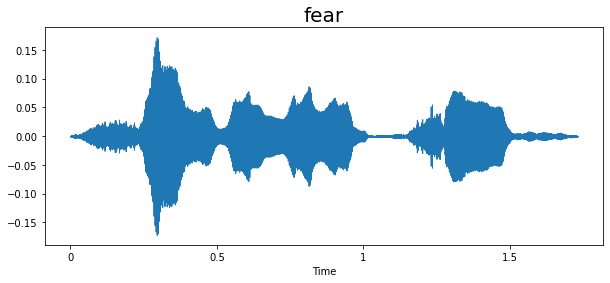

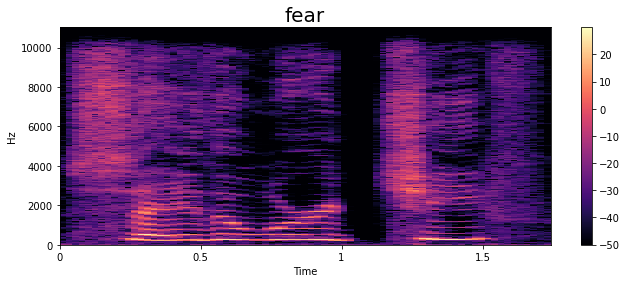

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

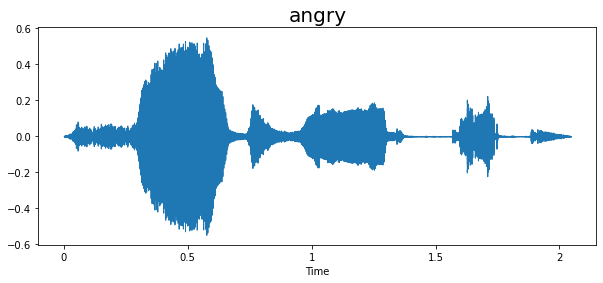

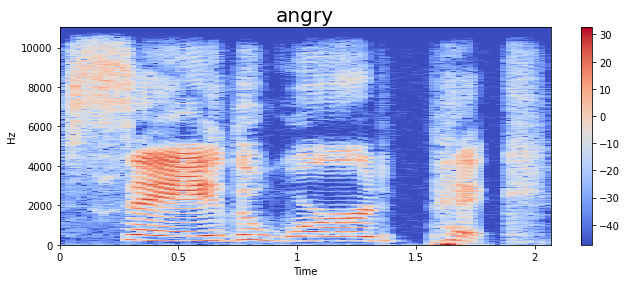

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

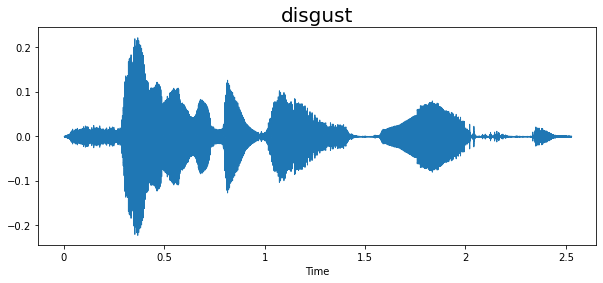

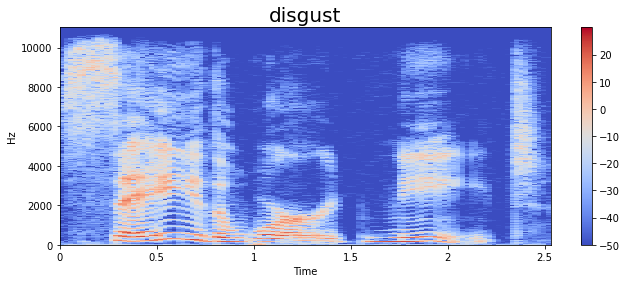

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

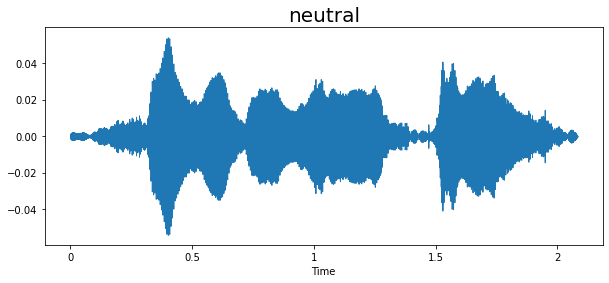

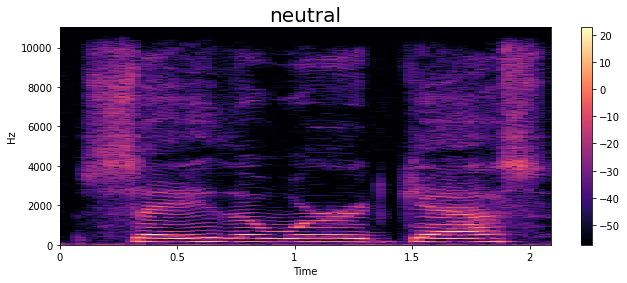

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

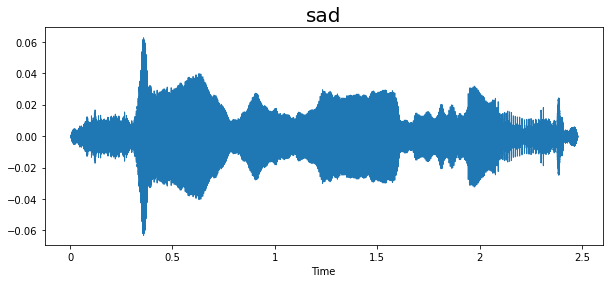

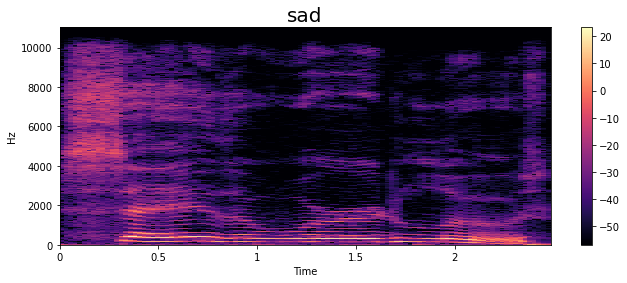

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

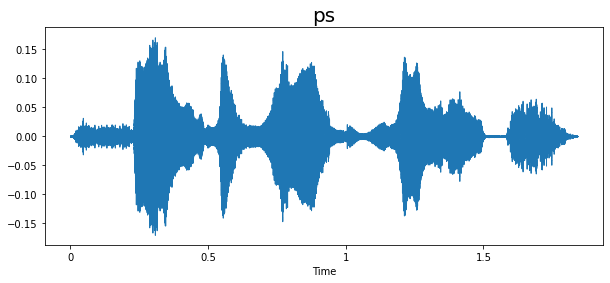

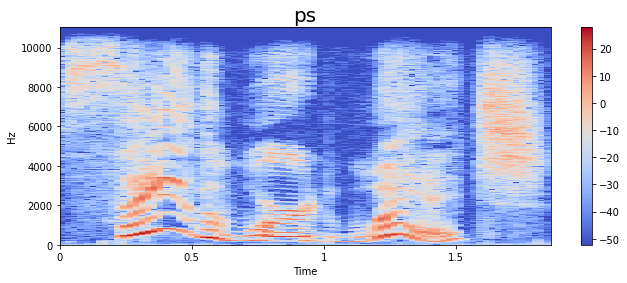

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

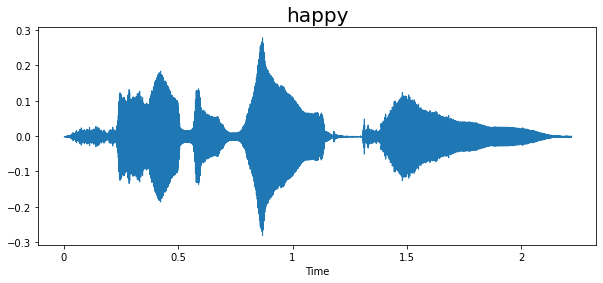

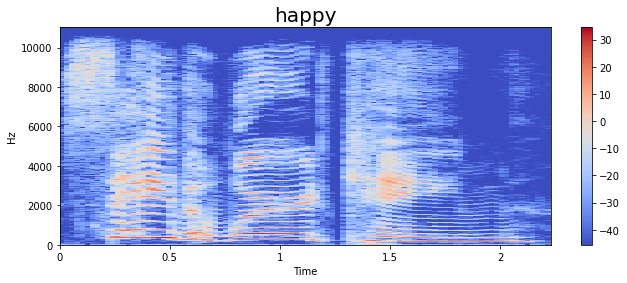

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[300]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

##With MFCC

In [ ]:
def extract_mfcc(filename): # Processing speech data, convert from raw data to MFCC data 
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.7126675e+02,  1.0725890e+02,  2.0952948e+01, -9.0892804e-01,
       -3.5842447e+00,  4.8934927e+00, -8.2703228e+00,  5.3702183e+00,
       -1.3188063e+01,  1.4095299e+00, -1.2579004e+01, -1.1762900e+01,
       -4.4418712e+00, -1.5662664e+00, -4.5357122e+00,  3.0001285e+00,
       -5.2532296e+00,  1.3558686e+01, -1.3723668e+00, -1.1875185e+00,
        5.5196357e-01,  3.1538048e-01, -4.8156290e+00,  7.4391251e+00,
       -4.6894803e+00,  8.5296812e+00,  1.0970551e+00,  8.2794867e+00,
       -6.0108763e-01,  4.8613667e+00,  2.3740160e+00,  5.3184838e+00,
        5.9392586e+00,  5.6921902e+00, -6.1002940e-01,  3.6963158e+00,
        2.8230755e+00,  6.8360901e+00,  7.4249105e+00,  1.2747645e+01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-471.26675, 107.2589, 20.952948, -0.90892804,...
1       [-462.0165, 107.96355, 14.18771, -6.6401057, 2...
2       [-494.7188, 86.93718, 10.358218, 11.8401985, 1...
3       [-439.11743, 74.145805, 10.616907, -4.0833216,...
4       [-468.75656, 114.372375, 26.430683, 3.2925856,...
                              ...                        
2795    [-403.56064, 90.43468, -32.965668, -25.39162, ...
2796    [-433.08044, 67.6196, -2.774183, -12.010009, -...
2797    [-401.5019, 73.34511, -13.754089, -6.734912, -...
2798    [-464.93845, 100.58897, -0.37762287, -31.42963...
2799    [-413.96994, 52.781334, -4.1443295, 3.6677814,...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
# ## input split
# X = np.expand_dims(X, -1)
# X.shape

(2800, 40, 1)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# y = enc.fit_transform(df[['label']])

In [ ]:
y = df[['label']]

In [ ]:
# y = y.toarray()
# y.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
scaler=StandardScaler()
X = scaler.fit_transform(X)
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2240, 40), (560, 40), (2240, 7), (560, 7))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((2016, 40), (560, 40), (224, 40), (2016, 7), (560, 7), (224, 7))

In [ ]:
# from sklearn.preprocessing import LabelEncoder,StandardScaler

# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)
# X_val=scaler.transform(X_val)
# X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((2016, 40), (560, 40), (224, 40), (2016, 7), (560, 7), (224, 7))

#Training with LSTM model

##Create LSTM model 

In [ ]:
from keras.engine import input_spec
from typing import Sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

modelLSTM = Sequential([
    LSTM(256, return_sequences=True, input_shape=(40,1)),
    LSTM(256),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='sigmoid'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])


In [ ]:
modelLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
modelLSTM.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 40, 256)           264192    
                                                                 
 lstm_10 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_36 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dropout_38 (Dropout)        (None, 64)              

In [ ]:
historyLSTM = modelLSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=16, verbose = 1)

Epoch 1/150
126/126 [==============================] - 4s 14ms/step - loss: 0.4507 - accuracy: 0.1369 - val_loss: 0.4023 - val_accuracy: 0.1964
Epoch 2/150
126/126 [==============================] - 1s 8ms/step - loss: 0.4109 - accuracy: 0.2019 - val_loss: 0.3733 - val_accuracy: 0.3304
Epoch 3/150
126/126 [==============================] - 1s 8ms/step - loss: 0.3647 - accuracy: 0.3289 - val_loss: 0.3179 - val_accuracy: 0.4509
Epoch 4/150
126/126 [==============================] - 1s 8ms/step - loss: 0.3071 - accuracy: 0.4871 - val_loss: 0.2544 - val_accuracy: 0.6339
Epoch 5/150
126/126 [==============================] - 1s 8ms/step - loss: 0.2568 - accuracy: 0.6314 - val_loss: 0.2238 - val_accuracy: 0.7277
Epoch 6/150
126/126 [==============================] - 1s 8ms/step - loss: 0.2109 - accuracy: 0.7669 - val_loss: 0.1647 - val_accuracy: 0.8527
Epoch 7/150
126/126 [==============================] - 1s 8ms/step - loss: 0.1678 - accuracy: 0.8695 - val_loss: 0.1443 - val_accuracy: 0.892

##Plot result

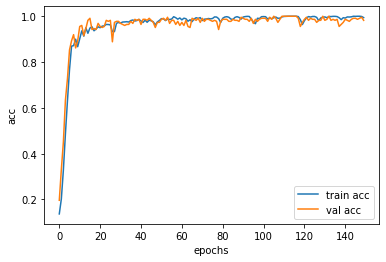

In [ ]:
epochs = list(range(150))
acc = historyLSTM.history['accuracy']
val_acc = historyLSTM.history['val_accuracy']

plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

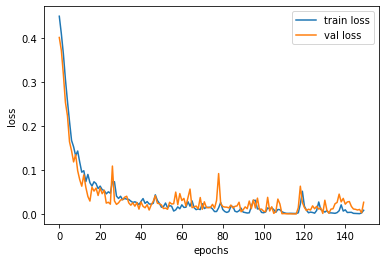

In [ ]:
epochs = list(range(150))
loss = historyLSTM.history['loss']
val_loss = historyLSTM.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model_acc_train = historyLSTM.evaluate


In [ ]:
model_acc_train = modelLSTM.evaluate(X_train, y_train, verbose=1)[1]
print("Train Accuracy: {:.3f}%".format(model_acc_train * 100))

63/63 [==============================] - 1s 4ms/step - loss: 0.0077 - accuracy: 0.9950
Train Accuracy: 99.504%


In [ ]:
model_acc_test = modelLSTM.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc_test * 100))

Test Accuracy: 96.071%


In [ ]:
modelLSTM.save("/content/drive/MyDrive/Colab Notebooks/emotion_recognition_by_signal_method/Process_Data_Speech")

In [ ]:
from tensorflow import keras
modelLSTM_load = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/emotion_recognition_by_signal_method/Process_Data_Speech')

In [ ]:
model_acc_test = modelLSTM_load.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc_test * 100))

Test Accuracy: 96.071%


#Training with CNN1D model

##Create CNN1D model

In [ ]:
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
modelCNN=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
modelCNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 512)           3072      
                                                                 
 batch_normalization (BatchN  (None, 40, 512)          2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 512)           1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 20, 512)          2048      
 hNormalization)                                                 
                                                        

In [ ]:
history = modelCNN.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=40, batch_size=32)

Epoch 1/40
63/63 [==============================] - 1s 9ms/step - loss: 0.5448 - accuracy: 0.8671 - val_loss: 0.6783 - val_accuracy: 0.7893
Epoch 2/40
63/63 [==============================] - 1s 9ms/step - loss: 0.1316 - accuracy: 0.9623 - val_loss: 0.0930 - val_accuracy: 0.9786
Epoch 3/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0859 - accuracy: 0.9757 - val_loss: 1.0869 - val_accuracy: 0.7000
Epoch 4/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0885 - accuracy: 0.9727 - val_loss: 10.2538 - val_accuracy: 0.0179
Epoch 5/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0737 - accuracy: 0.9777 - val_loss: 19.4948 - val_accuracy: 0.0000e+00
Epoch 6/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 41.0377 - val_accuracy: 0.0000e+00
Epoch 7/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 49.9688 - val_accuracy: 0.2250
Epoch 8/

## Plot results

In [ ]:
model_acc = model.evaluate(X, y, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

NameError: ignored

In [ ]:
epochs = list(range(40))
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()